In [1]:
pip install plotly

In [2]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from pytrends.request import TrendReq

# pytrends library set-up & Defining keyword

In [4]:
pytrends=TrendReq(hl='en-US',tz=360) #hl= host language; tz=time zone
keyword='cloud computing'

In [5]:
#Data Request

In [6]:
pytrends.build_payload([keyword],cat=0,geo='',gprop='',timeframe='today 12-m')

In [7]:
#country wise interest

In [8]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)

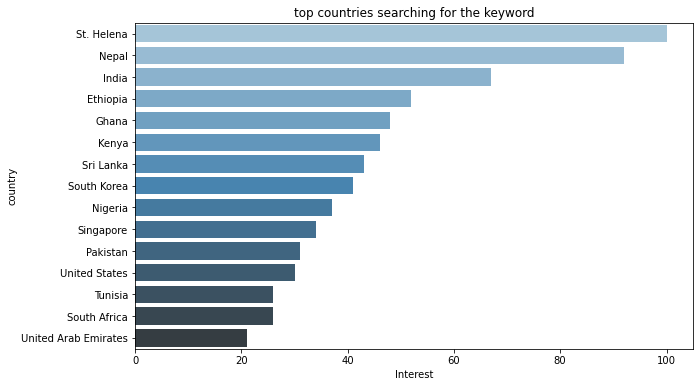

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index,palette='Blues_d')
plt.title(f"top countries searching for the {'keyword'}")
plt.xlabel('Interest')
plt.ylabel('country')
plt.show()

# WORLD MAP

In [35]:
region_data.columns

Index(['level_0', 'index', 'cloud computing'], dtype='object')

In [36]:
print(region_data.shape)
print(region_data.columns)
print(region_data.head())

(15, 3)
Index(['level_0', 'index', 'cloud computing'], dtype='object')
   level_0  index  cloud computing
0        0      0              100
1        1      1               92
2        2      2               67
3        3      3               52
4        4      4               48


In [38]:
region_data=region_data.reset_index(drop=True)
region_data.columns=['geoname',keyword]
fig=px.choropleth(
    region_data,
    locations='geoName',
    locationmode='ISO-3',
    color=keyword,
    title=f"search interest for {'keyword'} by country",
    color_continuous_scale='Blues'
)
fig.show()

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

# time-wise interest

In [40]:
time_df=pytrends.interest_over_time()

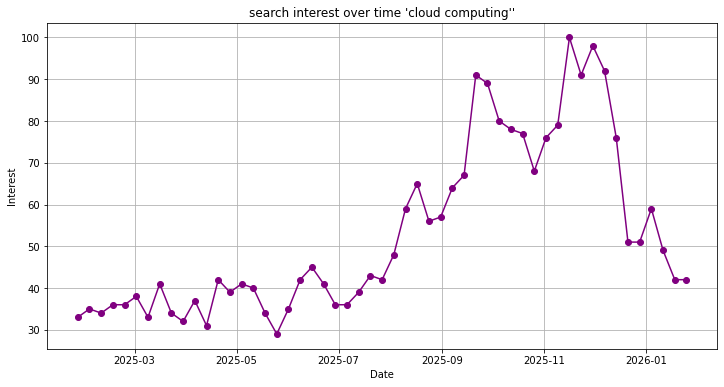

In [41]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker='o',color='purple')
plt.title(f"search interest over time '{keyword}''")
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.show()

# multiple keyword comparision

In [78]:
import time
pytrends.build_payload(keyword_list)
time.sleep(10)   # wait 10 seconds
compare_keyword = pytrends.interest_over_time()

from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-IN', tz=330, retries=2, backoff_factor=0.5)

keyword_list = keyword_list[:5]


TooManyRequestsError: The request failed: Google returned a response with code 429

In [ ]:
plt.figure(figsize=(12,6))
for kw in keyword_list:
    plt.plot(compare_keyword.index,compare_keyword[kw],label=kw)
    
plt.title("keyword comparision over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
    